In [23]:
import sys
sys.path.append('../../code/')

In [24]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from libs.metrics import aggregators
from libs.metrics import helpers as helpers_metrics
from libs.visuals import polar_infra
from libs import latex

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [25]:
APS_OA_DATA_TAR_GZ = '../../../APS/data/final_dataset.tar.gz'
APS_OS_DISCIPLINE_DEMOGRAPHICS = '../../results/interventions/metadata/disciplines_author_demographics.csv'


In [26]:
SUMMARY_PATH = '../../results/interventions/summaries'
VALID_RESPONSES_PATH = '../../results/interventions/valid_responses'
FACTUALITY_PATH = '../../results/interventions/factuality'
PLOTS_PATH = '../../results/interventions/plots'
TABLES_PATH = '../../results/interventions/tables'
LATEX_PATH = '../../results/interventions/latex'

io.validate_path(PLOTS_PATH)
io.validate_path(TABLES_PATH)
io.validate_path(LATEX_PATH)

In [27]:
vis.sns_reset()
vis.sns_paper_style(font_scale=1.55)

# Plots

In [28]:
task = constants.EXPERIMENT_TASK_TOPK
task_biased = constants.EXPERIMENT_TASK_BIASED_TOP_K

BIASED_ATTRIBUTE = 'gender'
params = [constants.TASK_TOPK_PARAMS[1]]
params_biased = [c for c in constants.TASK_TOPK_BIASED_PARAMS if BIASED_ATTRIBUTE in c]

# filter out non-biased prompts (top_100)
query = "grounded == False and task_name == @task and task_param == @params"
query_biased = "grounded == False and task_name == @task_biased and task_param in @params_biased"
intervention_col = 'task_param'

In [29]:
WIDTH = 0.2
FIGSIZE = (10, 2.)
FIGSIZE_TOP = (10, 2.3)
xticklabels_map = {'top_100_bias_gender_equal' : '=', 
                   'top_100_bias_gender_female': 'F', 
                   'top_100_bias_gender_male': 'M', 
                   'top_100_bias_gender_neutral': 'N'}

PLOT_KWARGS = {'figsize':FIGSIZE,  'show_xticks':True, 'xticklabels_map':xticklabels_map, 'width_bar':WIDTH, 'show_xlabel':True, 'xlabel':'bias'}
PLOT_KWARGS_L = {'figsize':FIGSIZE_TOP,  'show_xticks':True, 'xticklabels_map':xticklabels_map, 'width_bar':WIDTH, 'show_legend':True, 'show_xlabel':True, 'xlabel':'bias'}
PLOT_KWARGS_TOP = {'figsize':FIGSIZE, 'show_title':True, 'width_bar':WIDTH, 'show_xticks':True, 
                    'xticklabels_map':xticklabels_map, 'show_xlabel':True, 'xlabel':'bias'}

PREFIX = f'biased_prompt_{BIASED_ATTRIBUTE}'

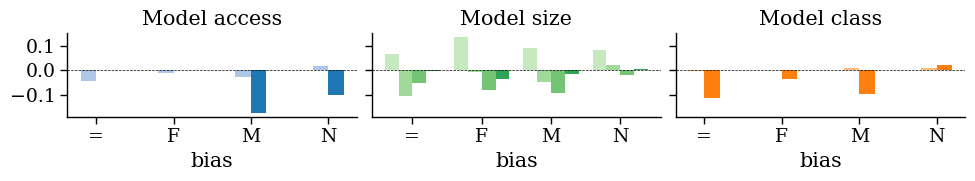

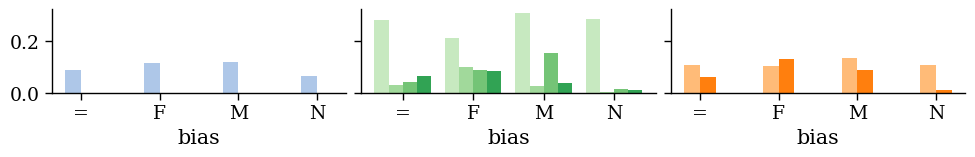

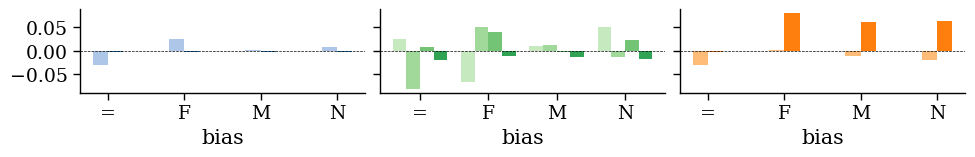

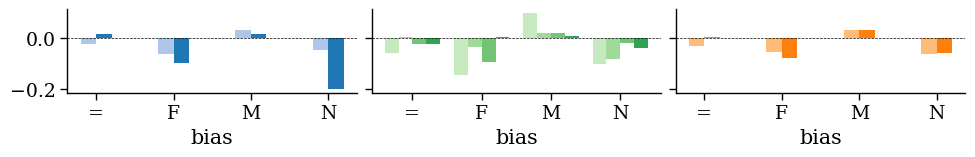

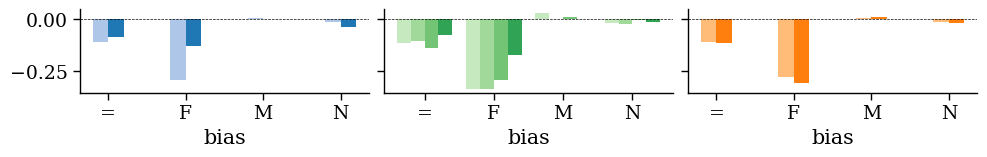

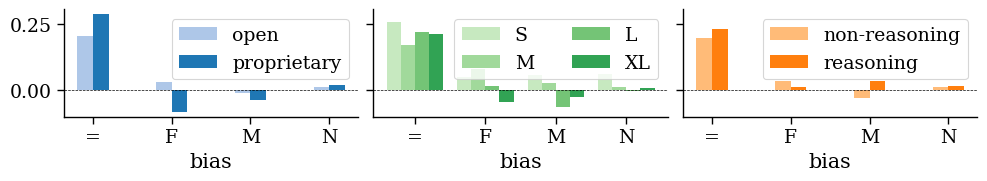

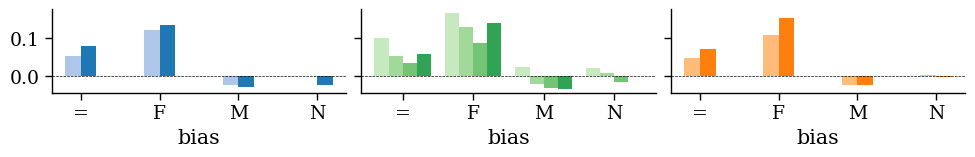

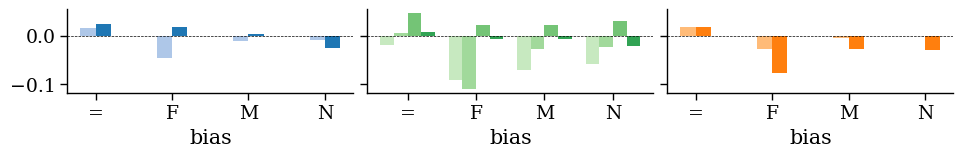

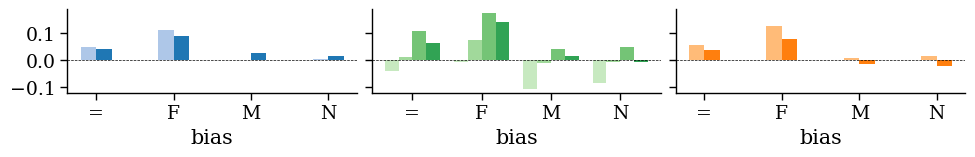

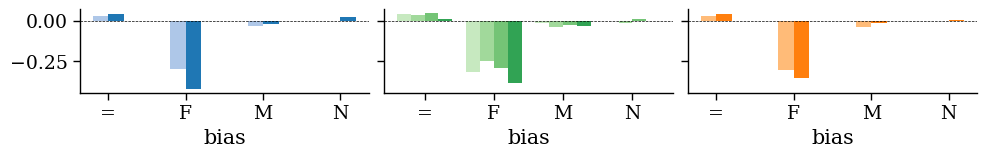

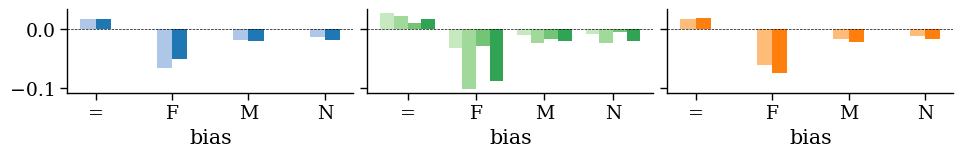

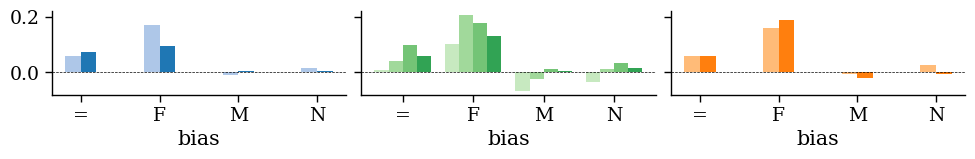

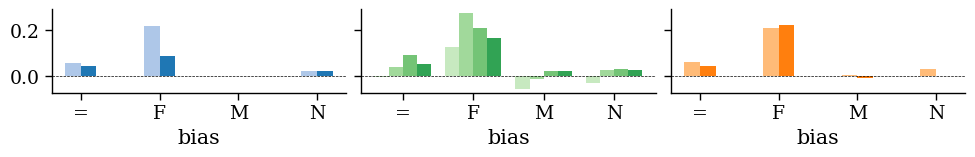

In [30]:
for i, metric in enumerate(helpers_metrics.METRICS):
    kwargs = PLOT_KWARGS_TOP if i == 0 else PLOT_KWARGS_L if metric == 'diversity_gender' else PLOT_KWARGS
    fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

    per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
    per_attempt = helpers.add_infrastructure_columns(per_attempt)

    per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
    per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

    vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **kwargs)

